# EDA Overview

This notebook summarizes the dataset schema and the target `y` distribution, and exports basic statistics into `res/data-statics/`.

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from src.eda.eda_utils import list_data_files, get_schema, summarize_y, summarize_missingness

DATA_ROOT = Path('data/project_5year')
OUT_DIR = Path('res/data-statics')
OUT_DIR.mkdir(parents=True, exist_ok=True)

paths = list_data_files(str(DATA_ROOT))
len(paths)

1218

In [2]:
sample_path = paths[0]
columns, dtypes = get_schema(sample_path)

pd.DataFrame({'column': columns, 'dtype': [dtypes[c] for c in columns]}).head(10)

,column,dtype
0,id,int64
1,DateTime,object
2,industry,int64
3,weight,float64
4,y,float64
5,f_0,float64
6,f_1,float64
7,f_2,float64
8,f_3,float64
9,f_4,float64


In [3]:
schema_df = pd.DataFrame({'column': columns, 'dtype': [dtypes[c] for c in columns]})
schema_df.to_csv(OUT_DIR / 'column_dtypes.csv', index=False)
schema_df

,column,dtype
0,id,int64
1,DateTime,object
2,industry,int64
3,weight,float64
4,y,float64
5,f_0,float64
6,f_1,float64
7,f_2,float64
8,f_3,float64
9,f_4,float64


In [4]:
y_summary = summarize_y(paths)
y_summary.to_csv(OUT_DIR / 'y_summary.csv', index=False)
y_summary

,stat,y
0,count,3.767954e+06
1,mean,7.972567e-05
2,std,2.360556e-02
3,min,-3.385246e-01
4,1%,-5.804265e-02
5,5%,-3.122412e-02
6,10%,-2.205075e-02
7,50%,-1.720147e-03
8,90%,2.366197e-02
9,95%,3.750180e-02


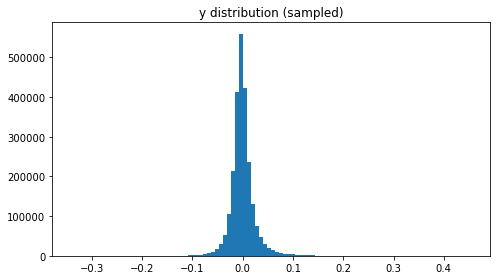

In [5]:
# Plot y distribution (sampled to limit memory)
import random

SAMPLE_PER_FILE = 2000
ys = []
for path in paths:
    df = pd.read_csv(path, usecols=['y'])
    if len(df) > SAMPLE_PER_FILE:
        ys.append(df['y'].sample(SAMPLE_PER_FILE, random_state=42))
    else:
        ys.append(df['y'])

y_sample = pd.concat(ys, ignore_index=True).dropna()
plt.figure(figsize=(7, 4))
plt.hist(y_sample, bins=100)
plt.title('y distribution (sampled)')
plt.tight_layout()
plt.savefig(OUT_DIR / 'y_hist.png')
plt.show()

In [6]:
missing_df = summarize_missingness(paths, columns)
missing_df.to_csv(OUT_DIR / 'column_missingness.csv', index=False)
missing_df.sort_values('missing_rate', ascending=False).head(10)

,column,missing,missing_rate
50,dv_16,25556,0.006782
49,r_16,25556,0.006782
56,dv_19,25188,0.006685
55,r_19,25188,0.006685
54,dv_18,25157,0.006677
53,r_18,25157,0.006677
52,dv_17,24881,0.006603
51,r_17,24881,0.006603
34,dv_8,19017,0.005047
33,r_8,19017,0.005047


In [7]:
from src.eda.eda_utils import summarize_id_date_range

meta_df = summarize_id_date_range(paths)
meta_df.to_csv(OUT_DIR / 'metadata.csv', index=False)
meta_df.head()

,id,start,end
0,1000001,2016-01-04 10:00:00,2020-12-31 10:00:00
1,1000002,2016-07-06 10:00:00,2020-12-31 10:00:00
2,1000003,2016-01-04 10:00:00,2020-12-31 10:00:00
3,1000004,2016-01-04 10:00:00,2020-12-31 10:00:00
4,1000005,2016-01-04 10:00:00,2020-12-31 10:00:00
